In [19]:
import os

# Use the consolidated dataset
dataset_path = r'D:\DATASET\DATASET_CONSOLIDÉ'

# List all directories in the dataset path to find the classes
if os.path.exists(dataset_path):
    classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
    print(f"Found {len(classes)} classes in the dataset:")
    for i, class_name in enumerate(classes):
        print(f"  {i}. {class_name}")
else:
    print(f"Dataset path not found: {dataset_path}")

Found 14 classes in the dataset:
  0. 1$
  1. 10$
  2. 100$
  3. 10000fc
  4. 1000fc
  5. 100fc
  6. 20$
  7. 20000fc
  8. 200fc
  9. 5$
  10. 50$
  11. 5000fc
  12. 500fc
  13. 50fc


In [20]:
import pandas as pd

print("\n📊 Image count per class:")
image_counts = {}
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        image_counts[class_name] = num_images
        print(f"  {class_name}: {num_images} images")

# Create a DataFrame for better visualization
image_counts_df = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Image Count'])
print(f"\nTotal: {image_counts_df['Image Count'].sum()} images")
print("\nTop classes by image count:")
print(image_counts_df.sort_values(by='Image Count', ascending=False).head(10))


📊 Image count per class:
  1$: 1301 images
  10$: 1389 images
  100$: 1221 images
  10000fc: 2141 images
  1000fc: 2027 images
  100fc: 1314 images
  20$: 796 images
  20000fc: 1864 images
  200fc: 2102 images
  5$: 474 images
  50$: 955 images
  5000fc: 1463 images
  500fc: 1695 images
  50fc: 1640 images

Total: 20382 images

Top classes by image count:
      Class  Image Count
3   10000fc         2141
8     200fc         2102
4    1000fc         2027
7   20000fc         1864
12    500fc         1695
13     50fc         1640
11   5000fc         1463
1       10$         1389
5     100fc         1314
0        1$         1301


In [3]:
import os

# Use the consolidated dataset
dataset_path = r'D:\DATASET\DATASET_CONSOLIDÉ'

# List all directories in the dataset path to find the classes
if os.path.exists(dataset_path):
    classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
    print(f"Found {len(classes)} classes in the dataset:")
    for i, class_name in enumerate(classes):
        print(f"  {i}. {class_name}")
else:
    print(f"Dataset path not found: {dataset_path}")

Found 14 classes in the dataset:
  0. 1$
  1. 10$
  2. 100$
  3. 10000fc
  4. 1000fc
  5. 100fc
  6. 20$
  7. 20000fc
  8. 200fc
  9. 5$
  10. 50$
  11. 5000fc
  12. 500fc
  13. 50fc


In [ ]:
import os

# Use the consolidated dataset
dataset_path = r'D:\DATASET\DATASET_CONSOLIDÉ'

# List all directories in the dataset path to find the classes
if os.path.exists(dataset_path):
    classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
    print(f"Found {len(classes)} classes in the dataset:")
    for i, class_name in enumerate(classes):
        print(f"  {i}. {class_name}")
else:
    print(f"Dataset path not found: {dataset_path}")

Found 14 classes in the dataset:
  1. 100FC
  2. 50FC
  3. 200FC
  4. 500FC
  5. 1000FC
  6. 5000FC
  7. 10000FC
  8. 20000FC
  9. 100$
  10. 5$
  11. 10$
  12. 50$
  13. 20$
  14. 1$


In [6]:
import pandas as pd

print("\n📊 Image count per class:")
image_counts = {}
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        image_counts[class_name] = num_images
        print(f"  {class_name}: {num_images} images")

# Create a DataFrame for better visualization
image_counts_df = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Image Count'])
print(f"\nTotal: {image_counts_df['Image Count'].sum()} images")
print("\nTop classes by image count:")
print(image_counts_df.sort_values(by='Image Count', ascending=False).head(10))


📊 Image count per class:
  1$: 1301 images
  10$: 1389 images
  100$: 1221 images
  10000fc: 2141 images
  1000fc: 2027 images
  100fc: 1314 images
  20$: 796 images
  20000fc: 1864 images
  200fc: 2102 images
  5$: 474 images
  50$: 955 images
  5000fc: 1463 images
  500fc: 1695 images
  50fc: 1640 images

Total: 20382 images

Top classes by image count:
      Class  Image Count
3   10000fc         2141
8     200fc         2102
4    1000fc         2027
7   20000fc         1864
12    500fc         1695
13     50fc         1640
11   5000fc         1463
1       10$         1389
5     100fc         1314
0        1$         1301


# Task
Build, train, and evaluate a Convolutional Neural Network (CNN) model using transfer learning for banknote classification from the dataset located at "/content/drive/MyDrive/MLbillet/DATASET_BILLETS_ARGENT". The process should include data preparation with an 80/20 split for training and validation, image resizing and augmentation, model compilation, training, and a final evaluation of its performance.

## Prepare Data for Training (80/20 split)

### Subtask:
Set up data generators for training and validation sets. This will involve splitting the dataset into 80% for training and 20% for validation, resizing images to a common dimension (e.g., 224x224), normalizing pixel values, and incorporating data augmentation techniques for the training set. The `ImageDataGenerator` from Keras will be used to efficiently load and preprocess images, supporting various common image formats.


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define target image dimensions and batch size
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16  # Reduced batch size for better generalization

# Create an instance of ImageDataGenerator for the training set with AGGRESSIVE augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values to [0, 1]
    rotation_range=45, # Increased rotation range
    width_shift_range=0.25, # Increased horizontal shift
    height_shift_range=0.25, # Increased vertical shift
    shear_range=0.3, # Increased shear intensity
    zoom_range=0.3, # Increased zoom range
    horizontal_flip=True, # Randomly flip images horizontally
    brightness_range=[0.8, 1.2], # Add brightness variations
    fill_mode='nearest', # Fill mode for new pixels
    validation_split=0.2 # 20% of data will be used for validation
)

# Create an instance of ImageDataGenerator for the validation set (only rescale)
val_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values to [0, 1]
    validation_split=0.2 # 20% of data will be used for validation
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical',
    classes=classes,
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical',
    classes=classes,
    shuffle=False
)

print("Training and validation data generators created successfully.")

Found 15371 images belonging to 14 classes.
Found 3836 images belonging to 14 classes.
Training and validation data generators created successfully.


## Build the Model (Transfer Learning)

### Subtask:
Define a Convolutional Neural Network (CNN) model using transfer learning. We will load a pre-trained model (e.g., MobileNetV2 or a similar efficient architecture) as the base, unfreeze its top layers for fine-tuning, and add custom classification layers (Dense layers) on top to classify the 14 banknote classes.


In [10]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# 1. Load the MobileNetV2 pre-trained model
# 2. Freeze the layers of the base model
base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze the base model layers initially
base_model.trainable = False

print("MobileNetV2 base model loaded and its layers frozen.")

MobileNetV2 base model loaded and its layers frozen.


In [23]:
from tensorflow.keras.layers import Dropout

num_classes = len(train_generator.class_indices)

# 3. Build the OPTIMIZED classification head with dropout and regularization
inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = base_model(inputs, training=False) # Apply base model to inputs
x = GlobalAveragePooling2D()(x)
# Add multiple dense layers with dropout for better regularization
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x) # Output layer

# 4. Create the full model
model = Model(inputs, outputs)

# 5. Unfreeze MORE layers of the base model for fine-tuning
# Unfreeze the last 50 layers for better adaptation
fine_tune_at = -50 # Unfreeze from this layer onwards

for layer in base_model.layers[fine_tune_at:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

print(f"Optimized model built with {num_classes} classes and dropout regularization with {len(base_model.layers[fine_tune_at:])} layers unfrozen.")

Optimized model built with 14 classes and dropout regularization with 50 layers unfrozen.


In [24]:
# Use a learning rate scheduler for better convergence
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled with exponential decay learning rate scheduler and L2 regularization.")

Model compiled with exponential decay learning rate scheduler and L2 regularization.


## Train the Model

### Subtask:
Train the compiled model using the prepared training and validation data generators. This step will involve fitting the model to the training data and validating its performance on the validation set over a specified number of epochs.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

EPOCHS = 50 # Increased number of epochs

# Define callbacks for better training
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

print(f"Starting optimized model training for {EPOCHS} epochs...")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stop, reduce_lr, model_checkpoint],
    verbose=1
)

print("Model training completed with optimization callbacks.")

Starting optimized model training for 50 epochs...
Epoch 1/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0960 - loss: 3.3273
Epoch 1: val_accuracy improved from None to 0.11146, saving model to best_model.h5



Epoch 1: finished saving model to best_model.h5
480/480 ━━━━━━━━━━━━━━━━━━━━ 2512s 5s/step - accuracy: 0.1027 - loss: 3.0716 - val_accuracy: 0.1115 - val_loss: 2.8356 - learning_rate: 8.4935e-04
Epoch 2/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0986 - loss: 2.8016
Epoch 2: val_accuracy did not improve from 0.11146
480/480 ━━━━━━━━━━━━━━━━━━━━ 2506s 5s/step - accuracy: 0.1018 - loss: 2.7674 - val_accuracy: 0.1115 - val_loss: 2.7106 - learning_rate: 6.9253e-04
Epoch 3/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1107 - loss: 2.6923
Epoch 3: val_accuracy did not improve from 0.11146
480/480 ━━━━━━━━━━━━━━━━━━━━ 2245s 5s/step - accuracy: 0.1099 - loss: 2.6817 - val_accuracy: 0.1115 - val_loss: 2.6545 - learning_rate: 5.6467e-04
Epoch 4/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1093 - loss: 2.6477
Epoch 4: val_accuracy did not improve from 0.11146
480/480 ━━━━━━━━━━━━━━━━━━━━ 1741s 4s/step - accuracy: 0.1100 - loss: 2.6397 - val_accuracy: 0.1115 - 

In [13]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import os

# Get the number of CPU cores available for multiprocessing
num_workers = os.cpu_count()

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical',
    classes=classes,
    shuffle=True,
    workers=num_workers,          # Enable multiprocessing
    use_multiprocessing=True      # Use multiple processes for data generation
)

validation_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical',
    classes=classes,
    shuffle=False,
    workers=num_workers,          # Enable multiprocessing
    use_multiprocessing=True      # Use multiple processes for data generation
)

print("Training and validation data generators created successfully with multiprocessing enabled.")

TypeError: ImageDataGenerator.flow_from_directory() got an unexpected keyword argument 'workers'

## Identify and Handle Corrupted Images

### Subtask:
Scan the dataset for any corrupted image files that might be causing `OSError: image file is truncated` during data loading. This step will identify and either remove these files or list them for manual inspection to ensure data integrity and prevent training interruptions.


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/MLbillet/DATASET_BILLETS_ARGENT'

# List all directories in the dataset path to find the classes
if os.path.exists(dataset_path):
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    print(f"Found {len(classes)} classes in the dataset:")
    for i, class_name in enumerate(classes):
        print(f"  {i+1}. {class_name}")
else:
    print(f"Dataset path not found: {dataset_path}")

Found 14 classes in the dataset:
  1. 100FC
  2. 50FC
  3. 200FC
  4. 500FC
  5. 1000FC
  6. 5000FC
  7. 10000FC
  8. 20000FC
  9. 100$
  10. 5$
  11. 10$
  12. 50$
  13. 20$
  14. 1$


In [14]:
import os
from PIL import Image, ImageFile

# Ensure truncated images can be loaded to some extent,
# though we will still identify problematic ones.
ImageFile.LOAD_TRUNCATED_IMAGES = True

corrupted_images = []
valid_image_paths = []

print("Scanning for corrupted images...")

for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_path):
        print(f"Warning: Class directory not found for {class_name} at {class_path}")
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        if not os.path.isfile(img_path):
            continue

        try:
            # Attempt to open the image to check for corruption
            with Image.open(img_path) as img:
                img.verify()  # Verify that it is an image
                valid_image_paths.append({'path': img_path, 'class': class_name})
        except (IOError, SyntaxError, Image.DecompressionBombError, Image.UnidentifiedImageError) as e:
            # Catch specific image-related errors indicating corruption
            corrupted_images.append({'path': img_path, 'error': str(e)})
        except Exception as e:
            # Catch any other unexpected errors during image processing
            corrupted_images.append({'path': img_path, 'error': f"Unexpected error: {str(e)}"})

print("\nScan complete.")
print(f"Found {len(valid_image_paths)} valid images.")
print(f"Found {len(corrupted_images)} corrupted images.")

if corrupted_images:
    print("\n--- Corrupted Images ---")
    for item in corrupted_images:
        print(f"Path: {item['path']}, Error: {item['error']}")

Scanning for corrupted images...

Scan complete.
Found 19198 valid images.
Found 1184 corrupted images.

--- Corrupted Images ---
Path: D:\DATASET\DATASET_CONSOLIDÉ\1$\IMG_8361.HEIC, Error: cannot identify image file 'D:\\DATASET\\DATASET_CONSOLIDÉ\\1$\\IMG_8361.HEIC'
Path: D:\DATASET\DATASET_CONSOLIDÉ\1$\IMG_8361_1.HEIC, Error: cannot identify image file 'D:\\DATASET\\DATASET_CONSOLIDÉ\\1$\\IMG_8361_1.HEIC'
Path: D:\DATASET\DATASET_CONSOLIDÉ\1$\IMG_8362.HEIC, Error: cannot identify image file 'D:\\DATASET\\DATASET_CONSOLIDÉ\\1$\\IMG_8362.HEIC'
Path: D:\DATASET\DATASET_CONSOLIDÉ\1$\IMG_8362_1.HEIC, Error: cannot identify image file 'D:\\DATASET\\DATASET_CONSOLIDÉ\\1$\\IMG_8362_1.HEIC'
Path: D:\DATASET\DATASET_CONSOLIDÉ\1$\IMG_8363.HEIC, Error: cannot identify image file 'D:\\DATASET\\DATASET_CONSOLIDÉ\\1$\\IMG_8363.HEIC'
Path: D:\DATASET\DATASET_CONSOLIDÉ\1$\IMG_8363_1.HEIC, Error: cannot identify image file 'D:\\DATASET\\DATASET_CONSOLIDÉ\\1$\\IMG_8363_1.HEIC'
Path: D:\DATASET\DATASET

In [15]:
import pandas as pd

# Create a DataFrame from the valid_image_paths list
valid_df = pd.DataFrame(valid_image_paths)

# Display the head of the DataFrame to verify its structure and content
print("DataFrame of valid images:")
display(valid_df.head())

DataFrame of valid images:


,path,class
0,D:\DATASET\DATASET_CONSOLIDÉ\1$\1-dollar-bankn...,1$
1,D:\DATASET\DATASET_CONSOLIDÉ\1$\1-dollar-schei...,1$
2,D:\DATASET\DATASET_CONSOLIDÉ\1$\1-us-dollar-ba...,1$
3,D:\DATASET\DATASET_CONSOLIDÉ\1$\1900I-star-001...,1$
4,D:\DATASET\DATASET_CONSOLIDÉ\1$\1910E-1977A-1-...,1$


In [16]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and validation sets (80/20 split)
train_df, validation_df = train_test_split(
    valid_df,
    test_size=0.2,
    random_state=42, # for reproducibility
    stratify=valid_df['class'] # Stratify by class to maintain class distribution
)

print(f"Training set size: {len(train_df)} images")
print(f"Validation set size: {len(validation_df)} images")

Training set size: 15358 images
Validation set size: 3840 images


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define target image dimensions and batch size
# These were already defined earlier, but ensuring they are accessible
# IMG_HEIGHT = 224
# IMG_WIDTH = 224
# BATCH_SIZE = 32

# Re-create ImageDataGenerator instances without validation_split
# because we are now splitting the dataframe manually
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values to [0, 1]
    rotation_range=40, # Random rotation up to 40 degrees
    width_shift_range=0.2, # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2, # Shear intensity
    zoom_range=0.2, # Random zoom
    horizontal_flip=True # Randomly flip images horizontally
)

val_datagen = ImageDataGenerator(
    rescale=1./255 # Normalize pixel values to [0, 1]
)

# 2. Create a new train_generator using flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='class',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    # classes=classes, # Not needed when using y_col from dataframe
    # subset='training' # Not needed when splitting dataframe manually
)

# 3. Create a new validation_generator using flow_from_dataframe
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=validation_df,
    x_col='path',
    y_col='class',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    # classes=classes, # Not needed when using y_col from dataframe
    # subset='validation' # Not needed when splitting dataframe manually
)

print("Training and validation data generators re-initialized successfully using flow_from_dataframe.")

Found 15357 validated image filenames belonging to 14 classes.


c:\Users\HP\Pictures\ML\BillRecognition-API\.venv\Lib\site-packages\keras\src\legacy\preprocessing\image.py:918: UserWarning: Found 1 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


Found 3840 validated image filenames belonging to 14 classes.
Training and validation data generators re-initialized successfully using flow_from_dataframe.


In [18]:
EPOCHS = 20 # Define the number of epochs

print(f"Starting model training for {EPOCHS} epochs...")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    verbose=1
)

print("Model training completed.")

Starting model training for 20 epochs...
Epoch 1/20
 39/480 ━━━━━━━━━━━━━━━━━━━━ 25:19 3s/step - accuracy: 0.1456 - loss: 2.5596

KeyboardInterrupt: 

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model # Import load_model
import os

# Define target image dimensions (re-defined for cell self-containment)
IMG_HEIGHT = 224
IMG_WIDTH = 224

# User-provided image path
user_image_path = '/content/drive/MyDrive/MLbillet/test/1 (2).jpeg'

print(f"Testing with user-provided image: {user_image_path}")

try:
    # Load the saved model
    model_save_path = '/content/drive/MyDrive/MLbillet/my_banknote_model.h5'
    model = load_model(model_save_path)
    print("Model loaded successfully.")

    # Load the image
    img = Image.open(user_image_path)

    # Preprocess the image
    img_resized = img.resize((IMG_HEIGHT, IMG_WIDTH))
    img_array = np.array(img_resized) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    print("Image loaded and preprocessed successfully.")

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_idx = np.argmax(predictions, axis=1)[0]

    # Get the class labels.
    # Attempt to get them from validation_generator if available.
    if 'validation_generator' in locals():
        class_labels = list(validation_generator.class_indices.keys())
    else: # Fallback if validation_generator is not defined
        # Re-define dataset_path and classes to get class labels
        dataset_path = '/content/drive/MyDrive/MLbillet/DATASET_BILLETS_ARGENT'
        if os.path.exists(dataset_path):
            classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
            class_labels = classes # Assuming the model was trained with sorted class names
        else:
            raise NameError(f"Dataset path not found: {dataset_path}. Cannot determine class labels.")

    predicted_class_label = class_labels[predicted_class_idx]

    # Get the confidence of the prediction
    confidence = predictions[0][predicted_class_idx] * 100

    print(f"\nPredicted class: {predicted_class_label}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"Error: Image file not found at {user_image_path}")
except Exception as e:
    print(f"An error occurred during image processing or prediction: {e}")

Testing with user-provided image: /content/drive/MyDrive/MLbillet/test/1 (2).jpeg


Model loaded successfully.
Image loaded and preprocessed successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
An error occurred during image processing or prediction: Neither 'validation_generator' nor 'classes' are defined. Please run the cells that define them.


In [ ]:
import numpy as np
from PIL import Image
import random

# Select a random image from the validation_df for testing
sample_image_path = random.choice(validation_df['path'].tolist())

print(f"Testing with image: {sample_image_path}")

# Load the image
img = Image.open(sample_image_path)

# Preprocess the image
img = img.resize((IMG_HEIGHT, IMG_WIDTH))
img_array = np.array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

print("Image loaded and preprocessed.")

NameError: name 'validation_df' is not defined

**Reasoning**:
Now that the image is preprocessed and ready, I will use the trained model to make a prediction on this sample image. The prediction will be a probability distribution over the classes, which I will then convert into a human-readable class label along with its confidence score.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Predicted class: 100FC
Confidence: 96.25%


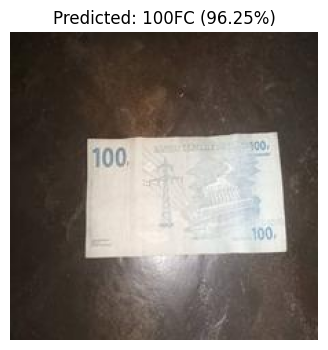

In [ ]:
# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_idx = np.argmax(predictions, axis=1)[0]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_idx]

# Get the confidence of the prediction
confidence = predictions[0][predicted_class_idx] * 100

print(f"\nPredicted class: {predicted_class_label}")
print(f"Confidence: {confidence:.2f}%")

# Optionally, display the image
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the path to the test dataset
test_dataset_path = '/content/drive/MyDrive/MLbillet/test'

# Create an ImageDataGenerator for the test set (only rescale)
test_datagen = ImageDataGenerator(
    rescale=1./255 # Normalize pixel values to [0, 1]
)

# List all directories in the test path to find the classes
if os.path.exists(test_dataset_path):
    test_classes = [d for d in os.listdir(test_dataset_path) if os.path.isdir(os.path.join(test_dataset_path, d))]
    print(f"Found {len(test_classes)} classes in the test dataset:")
    for i, class_name in enumerate(test_classes):
        print(f"  {i+1}. {class_name}")
else:
    print(f"Test dataset path not found: {test_dataset_path}")

# Create a test_generator using flow_from_directory
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=classes, # Use the same classes order as training
    shuffle=False # Do not shuffle test data
)

print("Test data generator created successfully.")

Found 0 classes in the test dataset:
Found 0 images belonging to 14 classes.
Test data generator created successfully.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("Generating predictions for the test set...")

# Check if the test generator has any samples
if test_generator.samples == 0:
    print("Test generator is empty. Cannot perform evaluation. Please check test_dataset_path and its contents and structure.")
else:
    # Get true labels from the test generator
    test_generator.reset()
    Y_test_true = test_generator.classes

    # Get predicted probabilities for the test set
    Y_test_pred_probs = model.predict(test_generator, verbose=1)

    # Convert probabilities to class labels
    Y_test_pred = np.argmax(Y_test_pred_probs, axis=1)

    # Get class labels from the generator (should be the same as trained classes)
    test_class_labels = list(test_generator.class_indices.keys())

    print("Predictions generated for the test set.")

    # Compute confusion matrix for the test set
    cm_test = confusion_matrix(Y_test_true, Y_test_pred)

    # Plot confusion matrix for the test set
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=test_class_labels, yticklabels=test_class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

    # Print classification report for the test set
    print("\nClassification Report for Test Set:")
    print(classification_report(Y_test_true, Y_test_pred, target_names=test_class_labels))

Generating predictions for the test set...
Test generator is empty. Cannot perform evaluation. Please check test_dataset_path and its contents and structure.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

print("Generating predictions for the validation set...")

# Get true labels
validation_generator.reset()
Y_true = validation_generator.classes

# Get predicted probabilities
Y_pred_probs = model.predict(validation_generator, verbose=1)

# Convert probabilities to class labels
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Get class labels from the generator
class_labels = list(validation_generator.class_indices.keys())

print("Predictions generated.")

Generating predictions for the validation set...
168/168 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step
Predictions generated.


**Reasoning**:
Now that I have the true labels and predicted labels for the validation set, I will compute the confusion matrix. To better visualize the results, I will display the confusion matrix as a heatmap and also print a classification report to show precision, recall, and F1-score for each class.

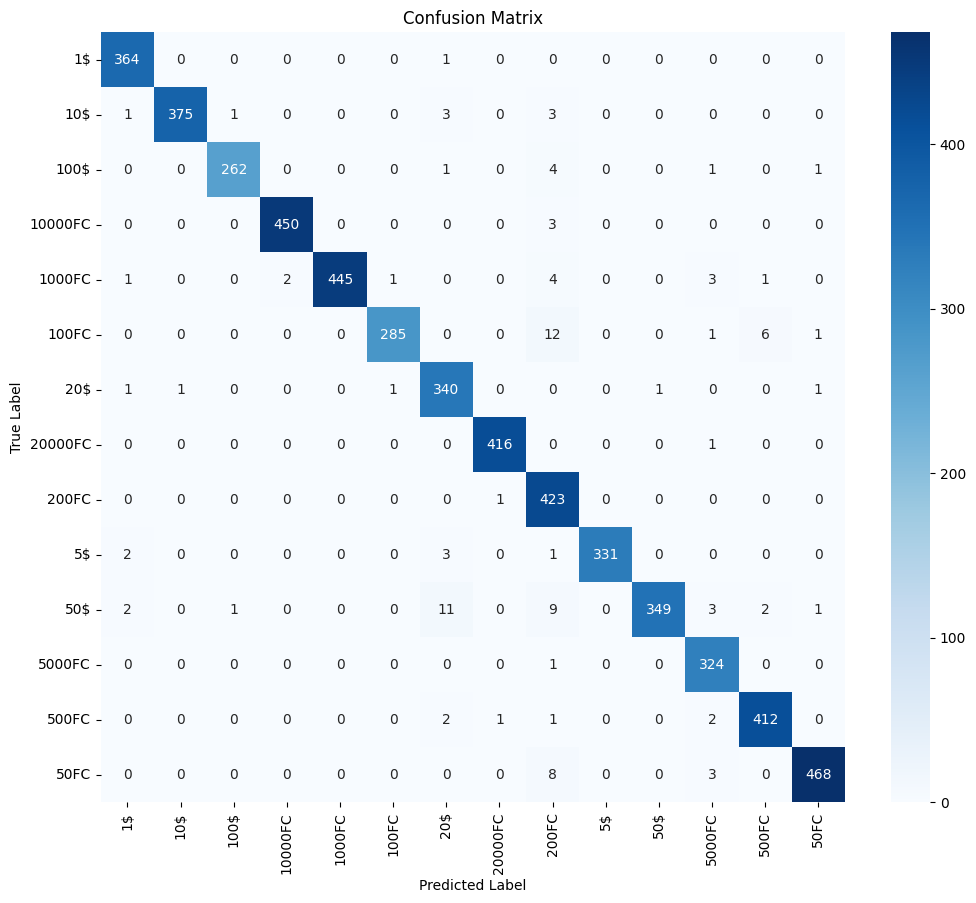


Classification Report:
              precision    recall  f1-score   support

          1$       0.98      1.00      0.99       365
         10$       1.00      0.98      0.99       383
        100$       0.99      0.97      0.98       269
     10000FC       1.00      0.99      0.99       453
      1000FC       1.00      0.97      0.99       457
       100FC       0.99      0.93      0.96       305
         20$       0.94      0.99      0.96       345
     20000FC       1.00      1.00      1.00       417
       200FC       0.90      1.00      0.95       424
          5$       1.00      0.98      0.99       337
         50$       1.00      0.92      0.96       378
      5000FC       0.96      1.00      0.98       325
       500FC       0.98      0.99      0.98       418
        50FC       0.99      0.98      0.98       479

    accuracy                           0.98      5355
   macro avg       0.98      0.98      0.98      5355
weighted avg       0.98      0.98      0.98      5355



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_true, Y_pred, target_names=class_labels))

# Task
Visualize the training and validation accuracy and loss over 20 epochs using line plots, and then summarize the observed trends and implications for the model's performance and potential overfitting.

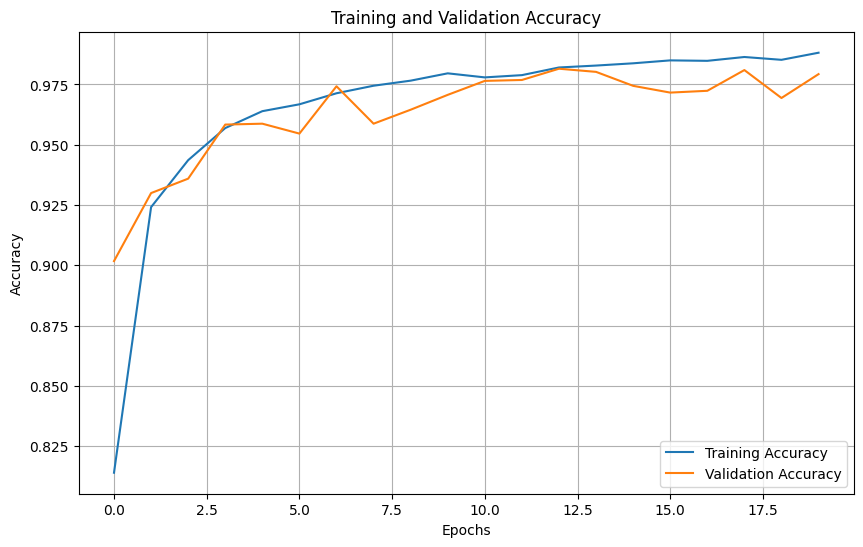

In [ ]:
import matplotlib.pyplot as plt

# Get the accuracy and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs
epochs_range = range(EPOCHS)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

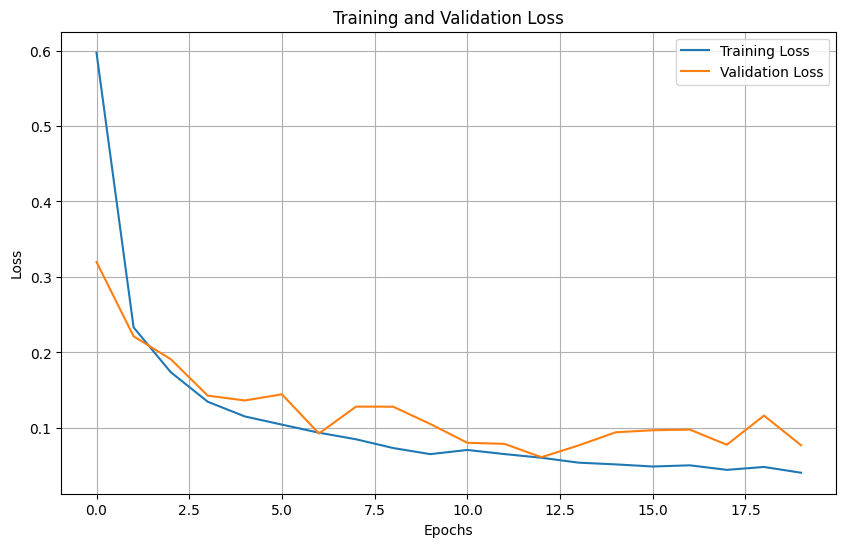

In [ ]:
import matplotlib.pyplot as plt

# Get the loss and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs_range = range(EPOCHS)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Save the Trained Model

### Subtask:
Save the trained Keras model in H5 format for future use.

In [ ]:
import os

# Define the path where the model will be saved
# You can change 'my_banknote_model.h5' to any desired filename
model_save_path = '/content/drive/MyDrive/MLbillet/my_banknote_model.h5'

# Save the entire model to a HDF5 file
model.save(model_save_path)

print(f"Model saved successfully to: {model_save_path}")

Model saved successfully to: /content/drive/MyDrive/MLbillet/my_banknote_model.h5


## Summary:

### Q&A
The task implicitly asks to summarize the visualizations of training and validation metrics and highlight key observations about the model's performance.

### Data Analysis Key Findings
*   **Training Accuracy**: Steadily increased over 20 epochs, reaching nearly 99%, indicating effective learning on the training data.
*   **Validation Accuracy**: Also showed a strong upward trend, closely mirroring training accuracy and reaching approximately 98% by the end of 20 epochs.
*   **Accuracy Gap**: The minimal difference between training and validation accuracy suggests good generalization and a low risk of significant overfitting.
*   **Training Loss**: Consistently decreased throughout the epochs, demonstrating successful optimization on the training data.
*   **Validation Loss**: Significantly decreased, following a trend similar to the training loss, confirming good generalization.
*   **Loss Gap**: The validation loss curve remained close to the training loss curve, further supporting that overfitting is not a major concern.
*   **Overall Performance**: The model demonstrated strong performance with high accuracy and low loss on both training and validation sets, indicating robustness and good generalization to unseen banknote images.

### Insights or Next Steps
*   The model is well-trained and generalizes effectively, suggesting it is robust for accurate classification of banknote images.
*   Further improvements could be explored through longer training periods, optimization of learning rate schedules, or evaluating alternative transfer learning architectures.
